In [12]:
import pandas as pd
import joblib

df = pd.read_csv("06 - dataset_limpio.csv") 


# Vamos a usar Random Forest Classifier como primer modelo:

from sklearn.model_selection import train_test_split

X = df.drop("Diabetes_binary", axis=1)
y = df["Diabetes_binary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)




In [17]:
# 3. Búsqueda de hiperparámetros (GridSearchCV)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100],
    'max_depth': [10, None],
    'min_samples_split': [2],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestClassifier(random_state=42, class_weight='balanced')

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring='recall',  # <-- cambiar a 'f1' si prefieres
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
print("Mejores hiperparámetros:", grid_search.best_params_)


Fitting 3 folds for each of 4 candidates, totalling 12 fits
Mejores hiperparámetros: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


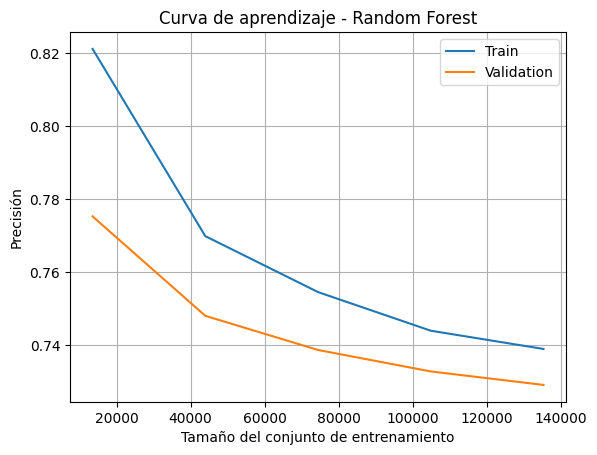

In [18]:
# 4. Curva de aprendizaje

from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    best_rf, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label="Train")
plt.plot(train_sizes, test_mean, label="Validation")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Precisión")
plt.title("Curva de aprendizaje - Random Forest")
plt.legend()
plt.grid()
plt.show()


In [20]:
# 5. Evaluación del modelo

from sklearn.metrics import classification_report, confusion_matrix

y_pred = best_rf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


joblib.dump(best_rf, "modelo_random_forest.pkl")

[[31585 12431]
 [ 1579  5141]]
              precision    recall  f1-score   support

         0.0       0.95      0.72      0.82     44016
         1.0       0.29      0.77      0.42      6720

    accuracy                           0.72     50736
   macro avg       0.62      0.74      0.62     50736
weighted avg       0.86      0.72      0.77     50736



['modelo_random_forest.pkl']

Al usar class_weight='balanced' junto con scoring='recall' en GridSearchCV, se logró transformar un modelo que inicialmente detectaba solo el 6% de los casos positivos en uno que detecta el 77%, lo que representa una mejora sustancial en sensibilidad. Esta estrategia es especialmente útil en contextos donde el costo de un falso negativo (no detectar la enfermedad) es mucho más alto que el de un falso positivo.